# Analysis Details

**What is Topic Modelling?**

Topic modelling is a method for finding a group of words (i.e. topics) from a collection of documents that best represents the information in the collection of text documents. It can also be thought of as a form of text mining - a way to obtain recurring patterns of words in textual data. The topics identified are crucial data points in helping a business figure out where to put their efforts in improving their product or services.

**Project description**

In this project, I will use Kmeans to cluster/group customer reviews from twitter data with the aim of identifying the main topics/ideas in the tweets.

# NLTK

Human language data is a very unstructured form of data. Natural Language Toolkit (NLTK) is a library that provides preprocessing and modelling tools for text data. Some of the tools include, classification, tokenization, stemming, tagging. 

# Loading and Exploring Data

In [58]:
import nltk
import numpy as np
import re
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
raw_data  = pd.read_csv("tweets.csv",encoding = 'ISO-8859-1')
print(len(raw_data))

21047


In [4]:
df = raw_data
df.head()

,username,date,tweet,mentions
0,shivaji_takey,10-06-2020,Please check what happens to this no 940417705...,['vodafonein']
1,sarasberiwala,10-06-2020,Network fluctuations and 4G Speed is pathetic....,['vodafonein']
2,chitreamod,10-06-2020,This has been going on since 3rd... this absol...,['vodafonein']
3,sanjan_suman,10-06-2020,@VodafoneIN I have done my recharge of 555 on...,['vodafonein']
4,t_nihsit,10-06-2020,But when???Still I am not received any call fr...,['vodafonein']


In [5]:
# check the number of unique tweets
unique_text = df.tweet.unique()
print(len(unique_text))

21047


In [6]:
df['tweet'][444]

'Can you share me good plan and can tell me how can i port my network operator'

So there are 21,047 tweets about Vodafone

# Cleaning

Text preprocessing is naturally different than classical numerical preprocessing. However, it is equally as important, if not more. Common preprocessing tasks are:

- Lowercase
- Dealing with numbers and punctuation
- Removing "stopwords"
- Tokenizing
- Stemming or Lemmatizing

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

## Remove any @ mentions

Remove @ from all of the tweets so that our model does not try to interpret it. 

In [9]:
df['Clean_text'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df['Clean_text'].head()

0    Please check what happens to this no 940417705...
1    Network fluctuations and 4G Speed is pathetic....
2    This has been going on since 3rd... this absol...
3      I have done my recharge of 555 on 9709333370...
4    But when???Still I am not received any call fr...
Name: Clean_text, dtype: object

`@[\w]*` means that there is an @ followed by any word character (`[\w]`) between 0 and unlimited times (`*`)

## Remove numbers and punctuation

Punctuation is rarely respected in modern text forms (e.g. social media). Unless you can guarantee a proper use of punctuation across the entire dataset, it is better to remove it.

In [10]:
df['Clean_text'] = df['Clean_text'].str.replace("[^a-zA-Z#]", " ")
df['Clean_text'].head()

0    Please check what happens to this no          ...
1    Network fluctuations and  G Speed is pathetic ...
2    This has been going on since  rd    this absol...
3      I have done my recharge of     on           ...
4    But when   Still I am not received any call fr...
Name: Clean_text, dtype: object

`[^a-zA-Z#]` means anything that is not a letter or a hashtag (i.e. targeting numbers and punctuation).

## Lower case

Text modelling algorithms are case sensitive. Two words need to have the same casing to be considered the same.

In [11]:
df["Clean_text"]= df["Clean_text"].str.lower() 
df['Clean_text']

0        please check what happens to this no          ...
1        network fluctuations and  g speed is pathetic ...
2        this has been going on since  rd    this absol...
3          i have done my recharge of     on           ...
4        but when   still i am not received any call fr...
                               ...                        
21042    i sent u my contact no  but still did not get ...
21043    dear   i have bn facing ur network problem for...
21044    rubbish i made many time   you didn t resolved...
21045    why the caller tunes sound so horrible  if a s...
21046      what nonsense are u guys saying    i m getti...
Name: Clean_text, Length: 21047, dtype: object

## Remove whitespace and words of length 1 or 2

Here is a basic way of removing short common words.

In [12]:
df['Clean_text'] = df['Clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df['Clean_text'].head()

0    please check what happens this not woking sinc...
1    network fluctuations and speed pathetic need j...
2    this has been going since this absolutely unpr...
3    have done recharge but haven got perday with u...
4    but when still not received any call from cust...
Name: Clean_text, dtype: object

## Tokenizing

Tokenizing means transforming a single string into a list of words, also called word tokens. For preprocessing tasks dealing with entire words, you will need to tokenize your text.

In [13]:
df['Clean_text'] = df['Clean_text'].apply(lambda x: x.split())
df['Clean_text'].head()

0    [please, check, what, happens, this, not, woki...
1    [network, fluctuations, and, speed, pathetic, ...
2    [this, has, been, going, since, this, absolute...
3    [have, done, recharge, but, haven, got, perday...
4    [but, when, still, not, received, any, call, f...
Name: Clean_text, dtype: object

## Lemmatizing

Lemmatizing is a technique used to find the root of words, in order to group them by meaning rather than exact form.

In [14]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized

In [15]:
df['Clean_text'] = df['Clean_text'].apply(lemmatize_text)

In [16]:
df['Clean_text'].head()

0    [please, check, what, happens, this, not, woki...
1    [network, fluctuation, and, speed, pathetic, n...
2    [this, ha, been, going, since, this, absolutel...
3    [have, done, recharge, but, haven, got, perday...
4    [but, when, still, not, received, any, call, f...
Name: Clean_text, dtype: object

In [18]:
# each row in clean_text is currently a list of words. Let's join them back together.
for i in range(len(df['Clean_text'])):
    df['Clean_text'][i] = ' '.join(df['Clean_text'][i])

In [19]:
df.head()

,username,date,tweet,mentions,Clean_text
0,shivaji_takey,10-06-2020,Please check what happens to this no 940417705...,['vodafonein'],please check what happens this not woking sinc...
1,sarasberiwala,10-06-2020,Network fluctuations and 4G Speed is pathetic....,['vodafonein'],network fluctuation and speed pathetic need ji...
2,chitreamod,10-06-2020,This has been going on since 3rd... this absol...,['vodafonein'],this ha been going since this absolutely unpro...
3,sanjan_suman,10-06-2020,@VodafoneIN I have done my recharge of 555 on...,['vodafonein'],have done recharge but haven got perday with u...
4,t_nihsit,10-06-2020,But when???Still I am not received any call fr...,['vodafonein'],but when still not received any call from cust...


## Removing duplicates

In [20]:
df.shape

(21047, 5)

In [21]:
# Removing any tweets with exactly duplicated text or tweets with no text
df.drop_duplicates(subset=['Clean_text'], keep = 'first',inplace= True)

In [22]:
# after dropping duplicates, I reset the index
df.reset_index(drop=True,inplace=True)

In [23]:
df.shape

(19754, 5)

## Indentifying special instances of tweets

In [24]:
# Check for tweets with length 0
df['Clean_text_length'] = df['Clean_text'].apply(len)

In [25]:
df[df['Clean_text_length']==0]

,username,date,tweet,mentions,Clean_text,Clean_text_length
20,omanmessi,10-06-2020,@VodafoneIN,"['ooredoooman', 'vodafonein']",,0


In [26]:
# check that this tweet with length 0 is not an artifact of previous preprocessing
raw_data[raw_data['username']=='omanmessi']

,username,date,tweet,mentions,Clean_text,Clean_text_length
20,omanmessi,10-06-2020,@VodafoneIN,"['ooredoooman', 'vodafonein']",,0


In [27]:
# We can simply drop these tweets
indexes = df[df['Clean_text_length']==0]['Clean_text'].index
indexes

Int64Index([20], dtype='int64')

In [28]:
df.drop(index = indexes,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19753 entries, 0 to 19753
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           19753 non-null  object
 1   date               19753 non-null  object
 2   tweet              19753 non-null  object
 3   mentions           19753 non-null  object
 4   Clean_text         19753 non-null  object
 5   Clean_text_length  19753 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [31]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19753 entries, 0 to 19752
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           19753 non-null  object
 1   date               19753 non-null  object
 2   tweet              19753 non-null  object
 3   mentions           19753 non-null  object
 4   Clean_text         19753 non-null  object
 5   Clean_text_length  19753 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 926.0+ KB


In [32]:
df['Clean_text'].head()

0    please check what happens this not woking sinc...
1    network fluctuation and speed pathetic need ji...
2    this ha been going since this absolutely unpro...
3    have done recharge but haven got perday with u...
4    but when still not received any call from cust...
Name: Clean_text, dtype: object

# Vectorizer

A way to translate our tweets into vectors of numbers that can be fed into our model.

**Tf-Idf Vectorizer**

Convert a collection of raw documents to a matrix of TF-IDF features. In information retrieval, Term Frequency - Inverse Document Frequency (TF-IDF) is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. 

For more on the difference between standard TF-IDF implementation and Sklearn implementation of TF-IDF see [here](https://towardsdatascience.com/how-sklearns-tf-idf-is-different-from-the-standard-tf-idf-275fa582e73d)

**Count Vectorizer**

Convert a collection of text documents to a matrix of token counts. The CountVectorizer provides a simple way to both tokenize a collection of documents and build a vocab of known words, but also to encode new documents using that vocab. 

The number of features will be equal to the vocab size.

Because our tweets are very short sentences, it might be better to use a count vectorizer.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# instanciate the vectorizer for unigrams only (ngram_range = (1,1)) 
# ignoring extremely rare words (typos) and excluding very common ones that have not been removed by the stop words
count_vect = CountVectorizer(analyzer='word', ngram_range=(1,1), stop_words='english', min_df=0.0001, max_df=0.7)
count_vect.fit(df['Clean_text'])
desc_matrix = count_vect.transform(df["Clean_text"])
desc_matrix

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.7, max_features=None, min_df=0.0001,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

<19753x6324 sparse matrix of type '<class 'numpy.int64'>'
	with 198242 stored elements in Compressed Sparse Row format>

In [40]:
desc_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
desc_matrix.shape

(19753, 6324)

19753 tweets, with 6324 features (words).

# Clustering

Object of KMeans is to group similar data points together and discover underlying patterns.

Great blog to visualize KMeans [here](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

In [44]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 3.3 MB/s            
You should consider upgrading via the '/home/kai/.pyenv/versions/3.8.12/envs/lewagon/bin/python3.8 -m pip install --upgrade pip' command.


In [46]:
from sklearn.cluster import KMeans
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

## 2 Centroids

In [47]:
# try first with 2 clusters
num_clusters = 2 
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
# assign each tweet to its cluster and covert to dataframe
tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
frame =  pd.DataFrame(tweets, index=[clusters])
frame

,Tweet,Cluster
0,please check what happens this not woking sinc...,0
0,network fluctuation and speed pathetic need ji...,0
0,this ha been going since this absolutely unpro...,0
0,have done recharge but haven got perday with u...,0
0,but when still not received any call from cust...,0
...,...,...
0,sent contact but still did not get response,0
0,dear have facing network problem for few day y...,0
0,rubbish made many time you didn resolved netwo...,0
0,why the caller tune sound horrible song heard ...,0


In [50]:
frame.head()

,Tweet,Cluster
0,please check what happens this not woking sinc...,0
0,network fluctuation and speed pathetic need ji...,0
0,this ha been going since this absolutely unpro...,0
0,have done recharge but haven got perday with u...,0
0,but when still not received any call from cust...,0


In [51]:
frame['Cluster'].value_counts()

0    17837
1     1916
Name: Cluster, dtype: int64

In [52]:
cluster_0 = frame[frame['Cluster'] == 0]
cluster_0

,Tweet,Cluster
0,please check what happens this not woking sinc...,0
0,network fluctuation and speed pathetic need ji...,0
0,this ha been going since this absolutely unpro...,0
0,have done recharge but haven got perday with u...,0
0,but when still not received any call from cust...,0
...,...,...
0,sent contact but still did not get response,0
0,dear have facing network problem for few day y...,0
0,rubbish made many time you didn resolved netwo...,0
0,why the caller tune sound horrible song heard ...,0


In [53]:
def wordcloud(cluster):
    # combining the image with the dataset
    Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

    # We use the ImageColorGenerator library from Wordcloud 
    # Here we take the color of the image and impose it over our wordcloud
    image_colors = ImageColorGenerator(Mask)

    # Now we use the WordCloud function from the wordcloud library 
    wc = WordCloud(background_color='black', height=1500, width=4000, mask=Mask).generate(cluster)

    # Size of the image generated 
    plt.figure(figsize=(10,20))

    # Here we recolor the words from the dataset to the image's color
    # recolor just recolors the default colors to the image's blue color
    # interpolation is used to smooth the image generated 
    plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")

    plt.axis('off')
    plt.show()

In [55]:
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])

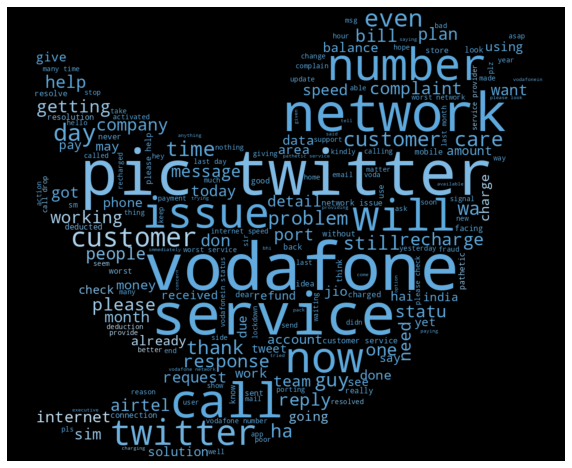

In [59]:
wordcloud(cluster_0_words)

Cluster 0: the words are mainly related to problems with the services (service, network).

Maybe we should remove vodafone and twitter.

In [60]:
cluster_1 = frame[frame['Cluster'] == 1]
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])

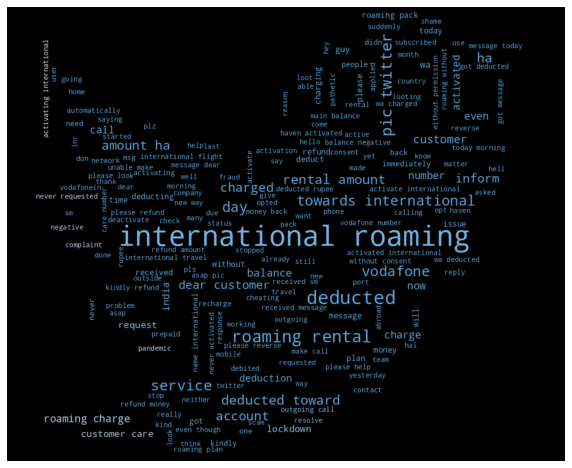

In [61]:
wordcloud(cluster_1_words)

International calls/charges and roaming charges seem to be key themes here.

Perhaps 2 clusters is too few as there is a lot of tweets put together in cluster 0. Let's try 8 clusters.

## 8 centroids

In [62]:
num_clusters = 8 
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [63]:
# assign each tweet to its cluster and covert to dataframe
tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
frame =  pd.DataFrame(tweets, index=[clusters])
frame

,Tweet,Cluster
1,please check what happens this not woking sinc...,1
2,network fluctuation and speed pathetic need ji...,2
1,this ha been going since this absolutely unpro...,1
1,have done recharge but haven got perday with u...,1
4,but when still not received any call from cust...,4
...,...,...
1,sent contact but still did not get response,1
2,dear have facing network problem for few day y...,2
2,rubbish made many time you didn resolved netwo...,2
1,why the caller tune sound horrible song heard ...,1


In [64]:
frame['Cluster'].value_counts()

1    8653
0    3278
2    2112
4    1798
6    1689
7    1527
3     531
5     165
Name: Cluster, dtype: int64

In [65]:
cluster_0 = frame[frame['Cluster'] == 0]
cluster_0

,Tweet,Cluster
0,why the hell previous plan deactivated and why...,0
0,double data speed #same you vodafone pic twitt...,0
0,have already used the link and done pia please...,0
0,super fast network thank you pic twitter com k...,0
0,you can provide the speed sufficient network p...,0
...,...,...
0,pic twitter com ynz,0
0,bad experience with number deduction balance a...,0
0,there response please check how vodafone respo...,0
0,too getting these message since december last ...,0


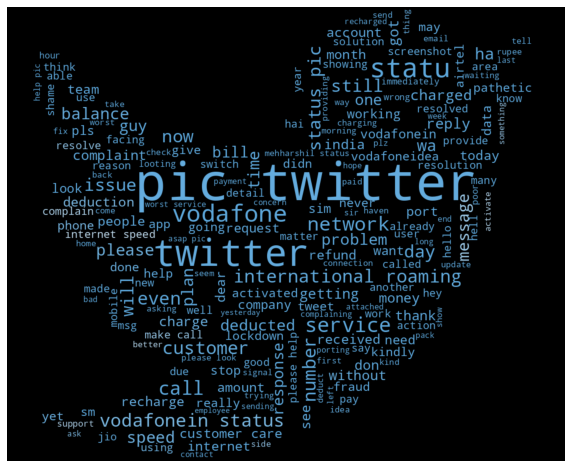

In [66]:
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])
wordcloud(cluster_0_words)

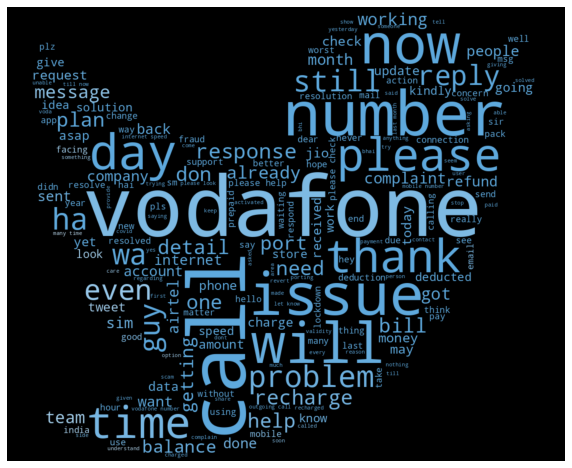

In [67]:
cluster_1 = frame[frame['Cluster'] == 1]
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])
wordcloud(cluster_1_words)

Perhaps around customer service and callbacks.

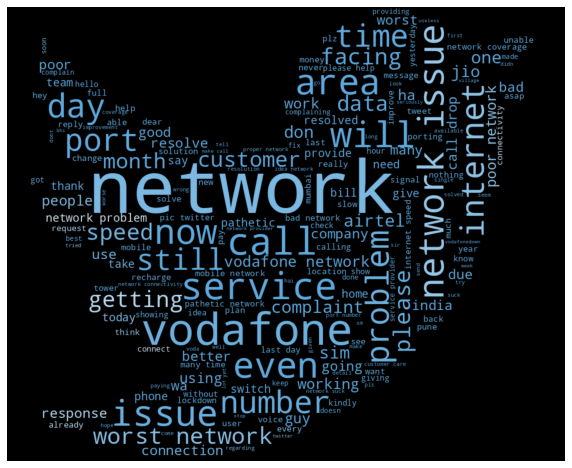

In [68]:
cluster_2 = frame[frame['Cluster'] == 2]
cluster_2_words = ' '.join(text for text in cluster_2['Tweet'])
wordcloud(cluster_2_words)

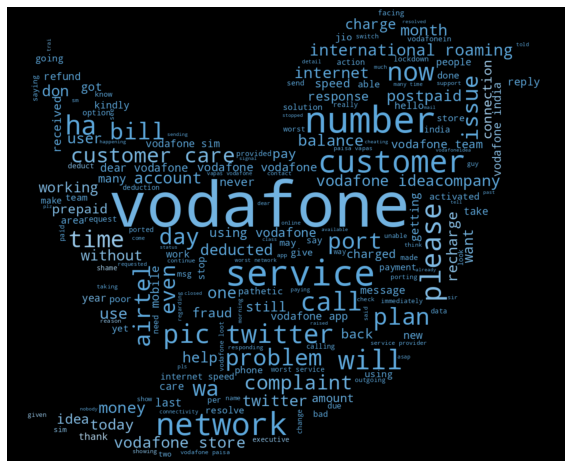

In [69]:
cluster_3 = frame[frame['Cluster'] == 3]
cluster_3_words = ' '.join(text for text in cluster_3['Tweet'])
wordcloud(cluster_3_words)

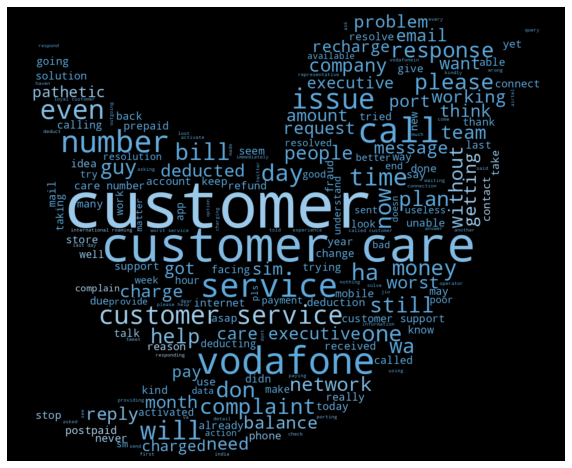

In [70]:
cluster_4 = frame[frame['Cluster'] == 4]
cluster_4_words = ' '.join(text for text in cluster_4['Tweet'])
wordcloud(cluster_4_words)

This looks to be primarily related to customer service.

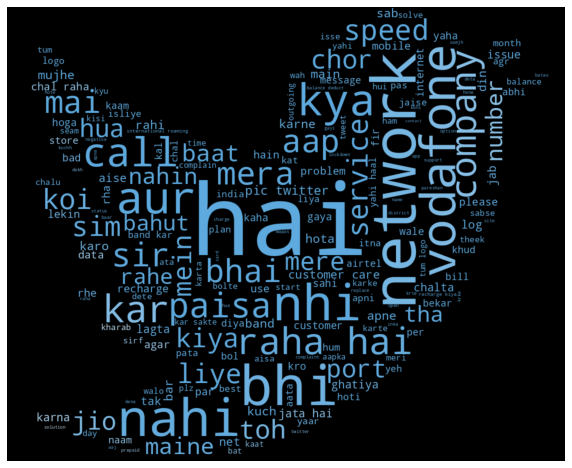

In [71]:
cluster_5 = frame[frame['Cluster'] == 5]
cluster_5_words = ' '.join(text for text in cluster_5['Tweet'])
wordcloud(cluster_5_words)

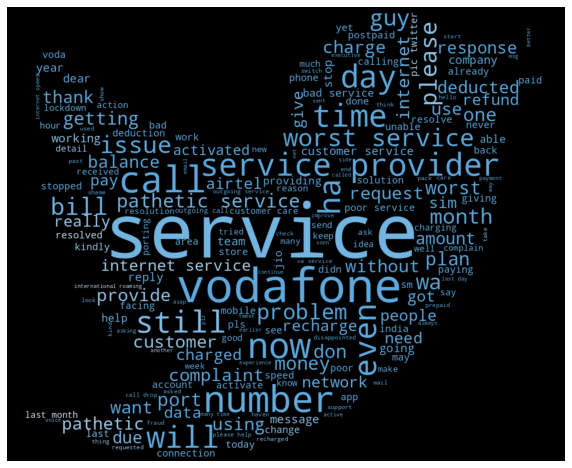

In [72]:
cluster_6 = frame[frame['Cluster'] == 6]
cluster_6_words = ' '.join(text for text in cluster_6['Tweet'])
wordcloud(cluster_6_words)

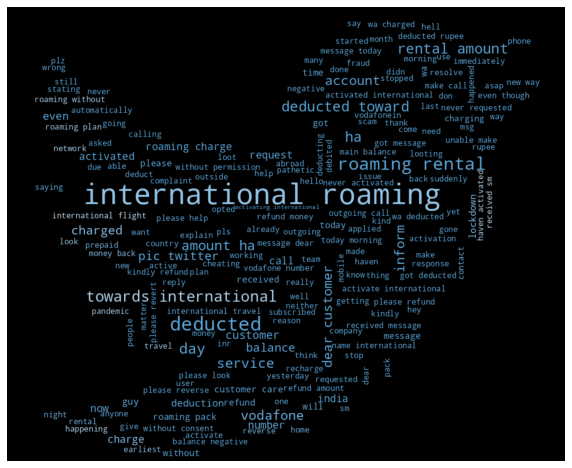

In [73]:
cluster_7 = frame[frame['Cluster'] == 7]
cluster_7_words = ' '.join(text for text in cluster_7['Tweet'])
wordcloud(cluster_7_words)

International roaming cluster.

# Identify Topics

In [74]:
def identify_topics(df, desc_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters)
    km.fit(desc_matrix)
    clusters = km.labels_.tolist()
    tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
    frame = pd.DataFrame(tweets, index = [clusters])
    print(frame['Cluster'].value_counts())

    
    for cluster in range(num_clusters):
        cluster_words = ' '.join(text for text in frame[frame['Cluster'] == cluster]['Tweet'])
        wordcloud(cluster_words)

3    8854
2    3375
4    2174
5    2173
0    1604
1    1573
Name: Cluster, dtype: int64


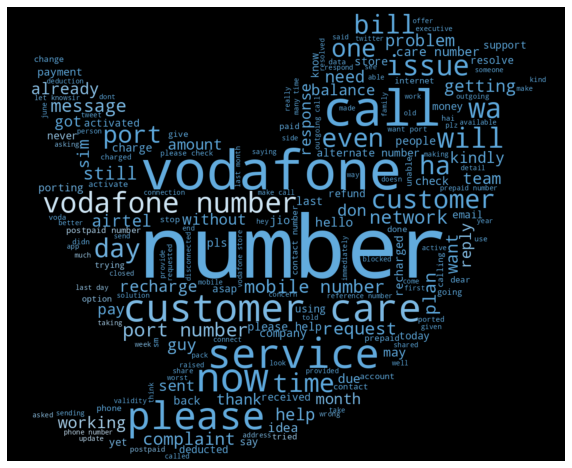

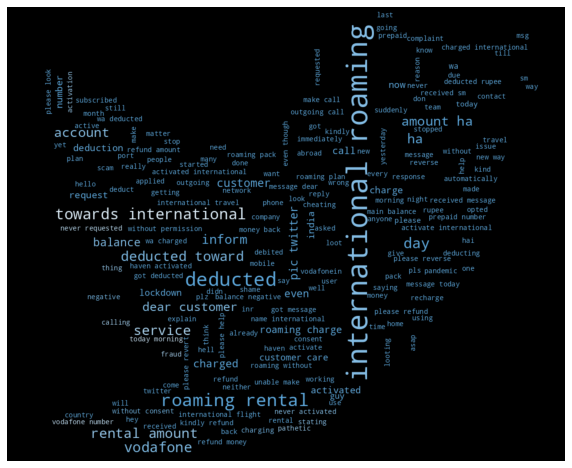

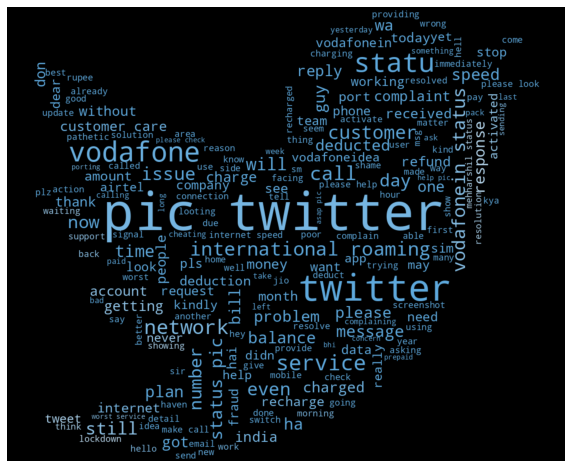

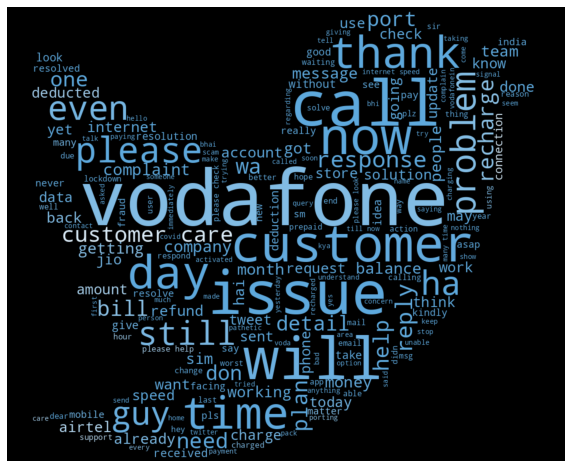

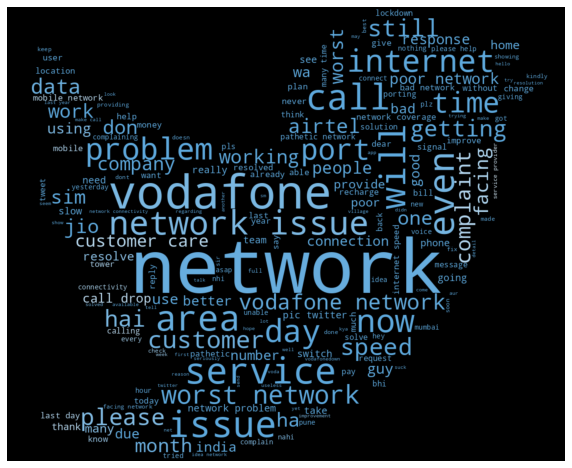

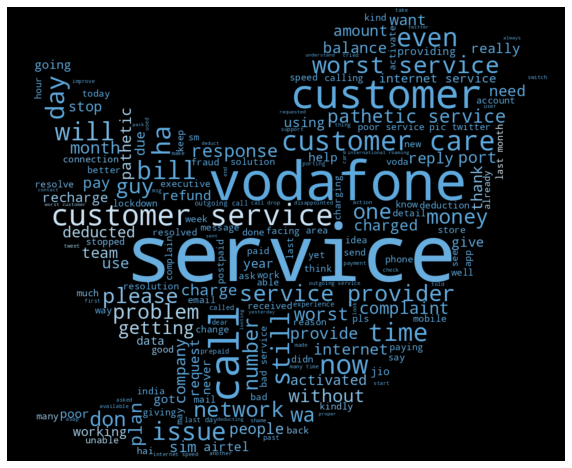

In [75]:
identify_topics(df, desc_matrix, 6)